In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Q5.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head(20)


In [ ]:
df.describe()

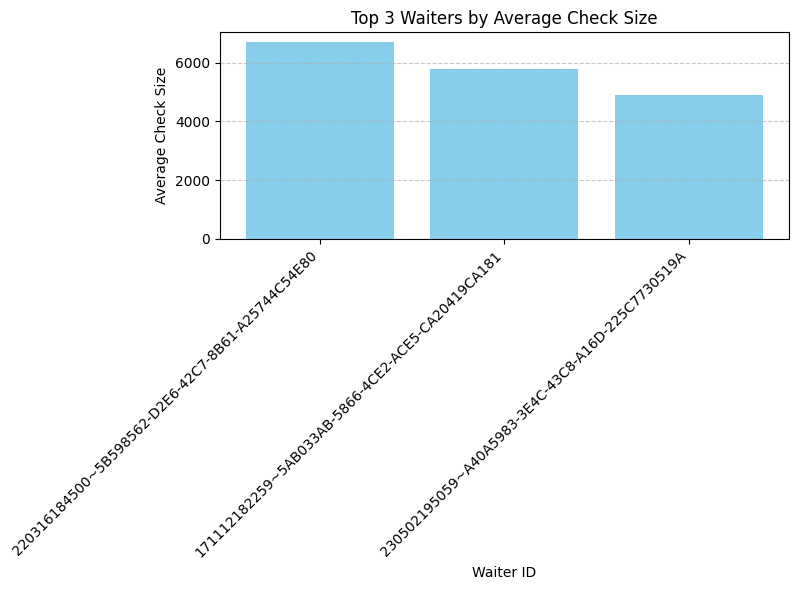

In [55]:
average_check_sizes = df.groupby('waiter_uuid')['bill_total_billed'].mean().reset_index()

average_check_sizes_sorted = average_check_sizes.sort_values(by='bill_total_billed', ascending=False)

top_three_waiters = average_check_sizes_sorted.head(3)

# Step 3: Create a bar chart for the top three waiters

# Option 1: Using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(top_three_waiters['waiter_uuid'], top_three_waiters['bill_total_billed'], color='skyblue')
plt.title('Top 3 Waiters by Average Check Size')
plt.xlabel('Waiter ID')
plt.ylabel('Average Check Size')
plt.xticks(top_three_waiters['waiter_uuid'])  # Ensure only the top 3 waiters are labeled
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
grouped = df.groupby('waiter_uuid').agg({
    'bill_total_billed': 'sum',  # Replace 'Bills' with the actual column name for bills
    'payment_total_tip': 'sum'    # Replace 'Tips' with the actual column name for tips
}).reset_index()

# Step 2: Filter out waiters with 0 bills
filtered = grouped[grouped['bill_total_billed'] > 0]

# Step 3: Calculate the percentage of tips relative to bills
filtered['Tip_Percentage'] = (filtered['payment_total_tip'] / filtered['bill_total_billed'])
average_tip_percentage_sorted = filtered.sort_values(by='Tip_Percentage', ascending=False)


# Display the ranking table
print("Ranking Table for Average Tip Percentage:")
print(average_tip_percentage_sorted[['waiter_uuid', 'Tip_Percentage']])
average_tip_percentage_sorted = average_tip_percentage_sorted.iloc[1:4]

/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/3527739696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='waiter_uuid', y='Tip_Percentage', data=average_tip_percentage_sorted, palette='viridis')


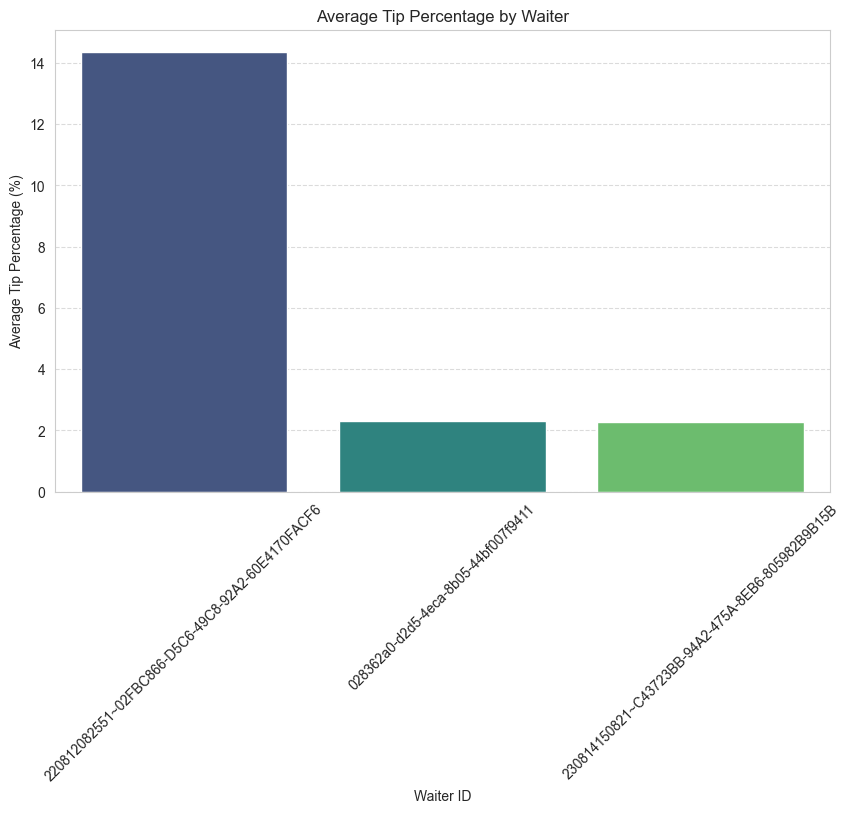

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x='waiter_uuid', y='Tip_Percentage', data=average_tip_percentage_sorted, palette='viridis')
plt.title('Average Tip Percentage by Waiter')
plt.xlabel('Waiter ID')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [70]:
df1 = pd.read_csv('../bills.csv')
df1 = df1[['venue_xref_id', 'waiter_uuid', 'bill_total_billed','payment_total_tip']]
df1.to_csv('Q5.csv', index=False)

In [ ]:
df2 = pd.read_csv('venues.csv')
# Merge the two DataFrames on the 'venue_id' column
merged_df = pd.merge(df1, df2, on='venue_xref_id', how='inner')
merged_df.head(20)

In [73]:
merged_df.to_csv('Q5.csv', index=False)

In [76]:
df1 = pd.read_csv('Q5.csv')
df1.head()
df1.size

71638288

In [92]:
import os
grouped = df1.groupby(['venue_xref_id','waiter_uuid']).agg({
    'bill_total_billed': 'sum',  # Replace 'Bills' with the actual column name for bills
    'payment_total_tip': 'sum'    # Replace 'Tips' with the actual column name for tips
}).reset_index()

# Step 2: Filter out waiters with 0 bills
filtered = grouped[grouped['bill_total_billed'] > 0]

# Step 3: Calculate the percentage of tips relative to bills
filtered['Tip_Percentage'] = (filtered['payment_total_tip'] / filtered['bill_total_billed']) * 100

# Step 4: Sort by tip percentage in descending order
average_tip_percentage_sorted = filtered.sort_values(by='Tip_Percentage', ascending=False)

# Step 5: Group by 'venue_xref_id' and display the top waiters for each venue
grouped_by_venue = average_tip_percentage_sorted.groupby('venue_xref_id')

output_folder = 'tip_percentage_graphs'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Step 7: Plot and save each graph
for venue, group in grouped_by_venue:
    plt.figure(figsize=(10, 6))
    sns.set_style('whitegrid')
    ax = sns.barplot(x='waiter_uuid', y='Tip_Percentage', data=group, palette='viridis')
    plt.title(f'Tip Percentage Ranking for Venue: {venue}', fontsize=16)
    plt.xlabel('Waiter UUID', fontsize=14)
    plt.ylabel('Tip Percentage (%)', fontsize=14)
    plt.xticks(rotation=45)
    
    # Add annotations
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.tight_layout()
    
    # Save the graph as an image file
    graph_filename = os.path.join(output_folder, f'tip_percentage_ranking_{venue}.png')
    plt.savefig(graph_filename)
    plt.close()  # Close the plot to free up memory

print(f"All graphs have been saved to the folder: {output_folder}")

/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/2396189548.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Tip_Percentage'] = (filtered['payment_total_tip'] / filtered['bill_total_billed']) * 100
/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/2396189548.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='waiter_uuid', y='Tip_Percentage', data=group, palette='viridis')
/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/2396189548.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

All graphs have been saved to the folder: tip_percentage_graphs


/var/folders/nj/sdrbc2n53j7bgbf8ffz9x0r40000gn/T/ipykernel_91178/2396189548.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='waiter_uuid', y='Tip_Percentage', data=group, palette='viridis')
